<font color='red'>
<br>Content:
    
* [Introduction](#1)
    * [What are LSTM ?](#2)
    * [The Core Idea Behind LSTMs](#3)
* [Long Short Term Memory(LSTM)](#4)
    * [Dataset EDA](#5)
    * [Create Autoencoders Model](#6)
    * [Visualizing](#7)

<a id="1"></a> <br>
## Introduction

<a id="2"></a> <br>
## What are LSTM ?

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

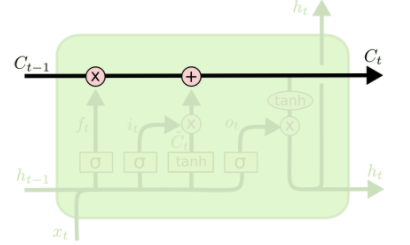

Don’t worry about the details of what’s going on. We’ll walk through the LSTM diagram step by step later. For now, let’s just try to get comfortable with the notation we’ll be using.

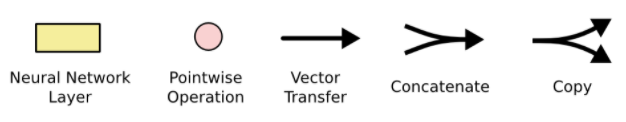


In the above diagram, each line carries an entire vector, from the output of one node to the inputs of others. The pink circles represent pointwise operations, like vector addition, while the yellow boxes are learned neural network layers. Lines merging denote concatenation, while a line forking denote its content being copied and the copies going to different locations.

<a id="3"></a> <br>
## The Core Idea Behind LSTMs


The key to LSTMs is the cell state, the horizontal line running through the top of the diagram.
The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.


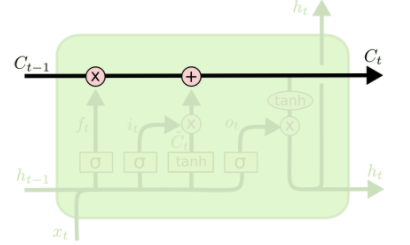

The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.
Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.

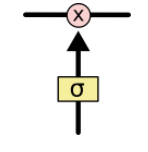

The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means “let nothing through,” while a value of one means “let everything through!”
An LSTM has three of these gates, to protect and control the cell state.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="4"></a> <br>
## Long Short Term Memory(LSTM)
<a id="5"></a> <br>
## DATASET EDA

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence

In [3]:
max_words = 10240
maxlen = 32

(x_train, y_train),(_, _) = imdb.load_data(num_words = max_words)

x_train = sequence.pad_sequences(x_train, maxlen = maxlen)


17465344/17464789 [==============================] - 0s 0us/step


<a id="6"></a> <br>
## Create LSTM Model

In [4]:
print(y_train[:10])

model = Sequential()
model.add(Embedding(max_words, 16, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation= 'sigmoid' ))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1) 


[1 0 0 1 0 0 1 0 1 0]
Epoch 1/15
196/196 [==============================] - 2s 10ms/step - loss: 0.5579 - acc: 0.7000
Epoch 2/15
196/196 [==============================] - 1s 7ms/step - loss: 0.3864 - acc: 0.8276
Epoch 3/15
196/196 [==============================] - 2s 9ms/step - loss: 0.3271 - acc: 0.8596
Epoch 4/15
196/196 [==============================] - 1s 7ms/step - loss: 0.2798 - acc: 0.8853
Epoch 5/15
196/196 [==============================] - 1s 7ms/step - loss: 0.2410 - acc: 0.9039
Epoch 6/15
196/196 [==============================] - 1s 8ms/step - loss: 0.2026 - acc: 0.9218
Epoch 7/15
196/196 [==============================] - 1s 8ms/step - loss: 0.1717 - acc: 0.9368
Epoch 8/15
196/196 [==============================] - 1s 7ms/step - loss: 0.1496 - acc: 0.9463
Epoch 9/15
196/196 [==============================] - 1s 7ms/step - loss: 0.1272 - acc: 0.9551
Epoch 10/15
196/196 [==============================] - 2s 9ms/step - loss: 0.1115 - acc: 0.9626
Epoch 11/15
196/196 [=====

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            163840    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               74240     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 238,209
Trainable params: 238,209
Non-trainable params: 0
_________________________________________________________________
None


<a id="7"></a> <br>
## Visualizing

Accuracy: % 98.46000075340271


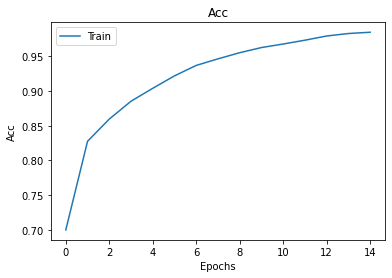

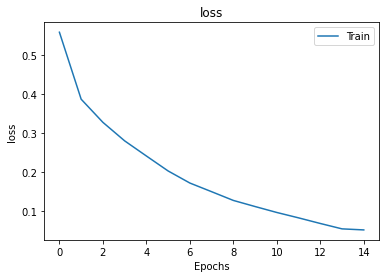

In [6]:
print("Accuracy: %",history.history["acc"][-1]*100)

plt.figure()
plt.plot(history.history["acc"], label = "Train")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()